## Getting Started
Importing libraries

In [ ]:
# No DS without pd
import pandas as pd

# Import Matplotlib library and assigns shorthand 'plt'
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Easier to build graphs with dates with the help of mdates
# Imports Seaborn library and assigns shorthand 'sns'
import seaborn as sns
# Imports Plotly library and assigns shorthand 'px'
import plotly.express as px
# Imports Numpy library and assigns shorthand 'np'
import numpy as np

######## Shit below doesn't work########
# SQLite to not have to use a whole SQL Workbench but just runs out of a class, easier to code with
import sqlite3
# SQLite doesn't like mySQL format so I need to parse it
import pymysql
# pandassql lets you execute commands like in mySQL and is able to read stuff into an mySQL DB and converts it directly into a pd df
from pandasql import sqldf

## 1. Business Understanding
### Objective
The goal of this project is to understand and forecast product demand of a mexican toy store across different stores based on the internal company dataset.  
The dataset includes sales transactions, store information, inventory records, product details, and a calendar that helps align daily sales with time-based patterns such as holidays or promotions.

### Business Context
Fluctuations in demand directly impact how well stock levels, staffing, and promotions are planned.  
Without proper forecasting, stores risk overstocking slow-moving items or running out of high-demand products, both of which reduce operational efficiency.

### Analytical Objective
By analyzing historical sales patterns together with contextual data (store type, product category, inventory availability, and calendar effects), this project aims to build a data-driven demand forecasting model.  
The insights will support decisions in inventory planning, resource allocation, and promotional timing.

### Success Criteria
- **Quantitative:** Low forecast error (e.g., RMSE / MAPE) and stable model performance across stores.  
- **Qualitative:** Forecast outputs provide clear, actionable insights that can be used for planning stock, workforce, and logistics activities.


## 2. Data Understanding
This chapter is the initiialization of the mySQL DB and converts it into an pd df
This chapter does the first analysation of the DB

### 2.1 Initial data report
Reading data (train, test store)

In [ ]:
# Create DB with SQLite
# HOST: Localhost DB_Name: mexico_toy_store_wh_db

# Create a connection to a newly created local database
# conn = sqlite3.connect("mexico_toy_store_wh_db.db")
# cursor = conn.cursor()

# # Read your SQL file
# with open(r"../sql/mexico_toy_store_wh_db.sql", 'r', encoding='utf-8') as f:
#     sql_script = f.read()

# # Execute all SQL commands in the file
# cursor.executescript(sql_script)
# conn.commit()


In [3]:
# I just read the CSV files in until we got the connection properly working
base_path = r'../data/'

calendar_df = pd.read_csv(base_path + 'calendar.csv')
# data_dictionary_df = pd.read_csv(base_path + 'data_dictionary.csv')  # Not needed useless reference guide
#tran and test data
df_train = pd.read_csv(base_path + 'rossmann-stroe-sales/train.csv')
df_test = pd.read_csv(base_path + 'rossmann-stroe-sales/test.csv')
# the additional store data
inventory_df = pd.read_csv(base_path + 'inventory.csv')
products_df = pd.read_csv(base_path + 'products.csv')
sales_df = pd.read_csv(base_path + 'sales.csv')
stores_df = pd.read_csv(base_path + 'stores.csv')

C:\Users\reser\AppData\Local\Temp\ipykernel_19012\2533034112.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(base_path + 'rossmann-stroe-sales/train.csv')


### 2.2 Describing data (train, test, store)
Train data
Test data
Store data

In [4]:
# Delete comment about whatever you want to have more insights, some are still missing the print commands

#print(calendar_df.shape)
print(calendar_df.head())
#calendar_df.tail()
calendar_df.info()
#print(calendar_df.describe())
print(calendar_df.describe(include=object))
#print(calendar_df.dtypes)
print('_________________________________________________________________________________')
sales_df.shape
print(sales_df.head())
#sales_df.tail()
sales_df.info()
sales_df.describe()
sales_df.describe(include=object)
sales_df.dtypes
print('_________________________________________________________________________________')
inventory_df.shape
print(inventory_df.head())
#inventory_df.tail()
inventory_df.info()
inventory_df.describe()
#inventory_df.describe(include=object) # Throws ERROR: ValueError: No objects to concatenate
inventory_df.dtypes
print('_________________________________________________________________________________')
products_df.shape
print(products_df.head())
#products_df.tail()
products_df.info()
products_df.describe()
products_df.describe(include=object)
products_df.dtypes
print('_________________________________________________________________________________')
stores_df.shape
print(stores_df.head())
#stores_df.tail()
stores_df.info()
stores_df.describe()
stores_df.describe(include=object)
stores_df.dtypes
    

       Date
0  1/1/2022
1  1/2/2022
2  1/3/2022
3  1/4/2022
4  1/5/2022
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    638 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
            Date
count        638
unique       638
top     1/1/2022
freq           1
_________________________________________________________________________________
   Sale_ID        Date  Store_ID  Product_ID  Units
0        1  2022-01-01        24           4      1
1        2  2022-01-01        28           1      1
2        3  2022-01-01         6           8      1
3        4  2022-01-01        48           7      1
4        5  2022-01-01        44          18      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   

Store_ID            int64
Store_Name         object
Store_City         object
Store_Location     object
Store_Open_Date    object
dtype: object

Data looks good! No NULL values as it seems, which already looks like most of the data can be used. The connection of the Database could look like something like this:



### 2.3 Verify data quality
In this section we take a look at the quality of the data. Cleaning up for NULL values and dublicates.
#### 2.3.1 Missing values / Completeness

In [5]:
# Making sure that there is really no null values, calendar is beeing skipped, because there isn't really anyhing useful in there
print(sales_df.isnull().sum())
print(products_df.isnull().sum())
print(stores_df.isnull().sum())
print(inventory_df.isnull().sum())

Sale_ID       0
Date          0
Store_ID      0
Product_ID    0
Units         0
dtype: int64
Product_ID          0
Product_Name        0
Product_Category    0
Product_Cost        0
Product_Price       0
dtype: int64
Store_ID           0
Store_Name         0
Store_City         0
Store_Location     0
Store_Open_Date    0
dtype: int64
Store_ID         0
Product_ID       0
Stock_On_Hand    0
dtype: int64


In [6]:
# Making sure that there isn't dublicated values
print(sales_df.duplicated().sum())
print(products_df.duplicated().sum())
print(stores_df.duplicated().sum())
print(inventory_df.duplicated().sum())

0
0
0
0


In [7]:
# Checking for stores which haven't made any sales
sales_with_open = sales_df.merge(stores_df[['Store_ID', 'Store_Open_Date']], on='Store_ID', how='left')

open_zero_sales = sales_with_open[
    (sales_with_open['Date'] >= sales_with_open['Store_Open_Date']) &
    (sales_with_open['Units'] == 0)
]

print(open_zero_sales.shape, open_zero_sales.head())
print('_________________________________________________________________________________')
# Proofing validity by checking the opposite case, which has to have results
validity_check = sales_with_open[
    (sales_with_open['Date'] >= sales_with_open['Store_Open_Date']) &
    (sales_with_open['Units'] != 0)
]

print(validity_check.shape)
print(validity_check.head())

(0, 6) Empty DataFrame
Columns: [Sale_ID, Date, Store_ID, Product_ID, Units, Store_Open_Date]
Index: []
_________________________________________________________________________________
(829262, 6)
   Sale_ID        Date  Store_ID  Product_ID  Units Store_Open_Date
0        1  2022-01-01        24           4      1      2010-07-31
1        2  2022-01-01        28           1      1      2011-04-01
2        3  2022-01-01         6           8      1      2003-12-13
3        4  2022-01-01        48           7      1      2016-03-23
4        5  2022-01-01        44          18      1      2014-12-27


In [8]:
# Checking for stores which haven't opened yet
closed_stores = sales_with_open[sales_with_open['Date'] < sales_with_open['Store_Open_Date']]
print(closed_stores.shape)

(0, 6)


In [9]:
# Checking for referal integretiy
missing_prod = sales_df[~sales_df['Product_ID'].isin(products_df['Product_ID'])]
missing_store = sales_df[~sales_df['Store_ID'].isin(stores_df['Store_ID'])]
print(f'Missing sales --> prod references: {missing_prod.shape} and missing sales --> store references: {missing_store.shape}')
missing_prod = inventory_df[~inventory_df['Product_ID'].isin(products_df['Product_ID'])]
missing_store = inventory_df[~inventory_df['Store_ID'].isin(stores_df['Store_ID'])]
print(f'Missing inventory --> prod references: {missing_prod.shape} and missing inventory --> store references: {missing_store.shape}')
print('_________________________________________________________________________________')
# Verification that the function works, by deleting the 'not' aka ~
missing_prod = sales_df[sales_df['Product_ID'].isin(products_df['Product_ID'])]
missing_store = sales_df[sales_df['Store_ID'].isin(stores_df['Store_ID'])]
print(f'Not missing sales --> prod references: {missing_prod.shape} and not missing sales --> store references: {missing_store.shape}')
missing_prod = inventory_df[inventory_df['Product_ID'].isin(products_df['Product_ID'])]
missing_store = inventory_df[inventory_df['Store_ID'].isin(stores_df['Store_ID'])]
print(f'Not missing inventory --> prod references: {missing_prod.shape} and not missing inventory --> store references: {missing_store.shape}')

Missing sales --> prod references: (0, 5) and missing sales --> store references: (0, 5)
Missing inventory --> prod references: (0, 3) and missing inventory --> store references: (0, 3)
_________________________________________________________________________________
Not missing sales --> prod references: (829262, 5) and not missing sales --> store references: (829262, 5)
Not missing inventory --> prod references: (1593, 3) and not missing inventory --> store references: (1593, 3)


In [10]:
# Checking for negative values which just don't make any sense in a sales dataset
print("Negative units:", (sales_df['Units'] < 0).sum())
print("Negative stock:", (inventory_df['Stock_On_Hand'] < 0).sum())
#print("Negative or zero price:", (products_df['Product_Price'] <= 0).sum()) # Encountering an ERROR, Product_Price is storred as Str

Negative units: 0
Negative stock: 0


In [11]:
# Converting Str to float
products_df['Product_Price'] = products_df['Product_Price'].str.replace('$', '').astype(float)
products_df['Product_Price'] = products_df['Product_Price'].astype(float)
#print(products_df['Product_Price']) # Replacing Str with float works well, when error, just load the import of the data again

products_df['Product_Cost'] = products_df['Product_Cost'].str.replace('$', '').astype(float)
products_df['Product_Cost'] = products_df['Product_Cost'].astype(float)
#print(products_df['Product_Cost']) 

In [12]:
# Continue checking for values which just don't make any sense
print("Negative or zero price:", (products_df['Product_Price'] <= 0).sum())
print("Price < Cost:", (products_df['Product_Price'] < products_df['Product_Cost']).sum())

Negative or zero price: 0
Price < Cost: 0


In [13]:
# Realized that all the dates are storred as String resulting in conversion to UNIX dates when used with matplotlib
# All dates are converted to datetime64
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
stores_df['Store_Open_Date'] = pd.to_datetime(stores_df['Store_Open_Date'], errors='coerce')
print(f'Sales date datatype: {sales_df['Date'].dtypes} and store open date datatype: {stores_df['Store_Open_Date'].dtypes}')

Sales date datatype: datetime64[ns] and store open date datatype: datetime64[ns]


The dataset looks already very clean when it comes to the obvious issues, the prices in the products dataframe where changed to float, that they are comparable. For clarification all floats are ment to be in USD.
We checked now for:
- Any NULL values and didn't find any
- Any dublicates and didn't find any
- Any shops which have 0 sales (No)
- Are there shops which aren't open yet (No)
- Do all foreign keys have a primary key (Yes)
- Is there any negative stock or sales (No)
- Are there any prices which don't make sense (No)

#### 2.3.2 Outliers detection / Accuracy

In total dates:  (638,)


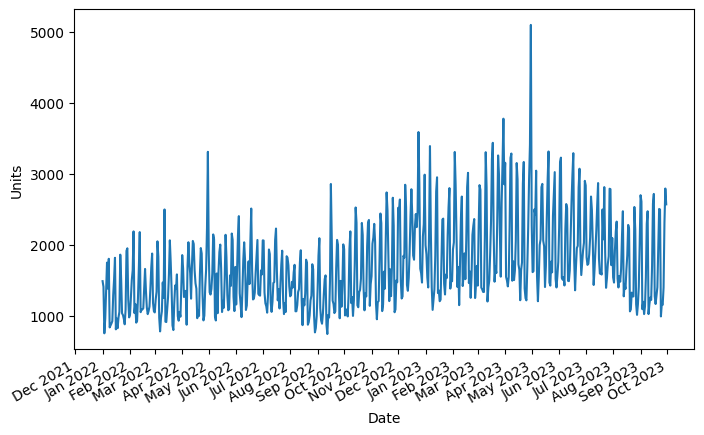

In [14]:
# Look for outliers in demand per day, by aggregating all units sold across all stores sorted per date
daily_sales = sales_df.groupby('Date')['Units'].sum()
print("In total dates: ", daily_sales.shape)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(daily_sales)
ax.set_xlabel("Date")
ax.set_ylabel("Units")

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()  # rotates nicely

plt.show()

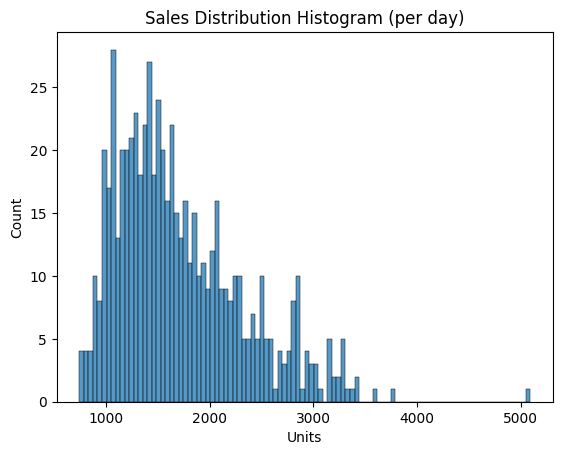

In [15]:
# Plot sales distribution, there is no shop with zero sales as awnsered in the section before
sns.histplot(daily_sales, bins=100)
plt.title('Sales Distribution Histogram (per day)')
plt.show()

In [22]:
# Boxplot for sales by day of the week
sales_df['DayOfWeek'] = sales_df['Date'].dt.day_name()
daily_sales = sales_df.groupby('Date')['Units'].sum().reset_index()
daily_sales['DayOfWeek'] = daily_sales['Date'].dt.day_name()


plt.figure(figsize=(10,6))
sns.boxplot(x='DayOfWeek', y='Units', data=sales_df)
plt.title('Units Sold by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Units')
plt.show()

ValueError: Length of DataFrame vectors must match length of `data` when both are used, but `data` has length 829262 and the vector passed to `y` has length 638.

<Figure size 1000x600 with 0 Axes>

## Data Prept Delete rows from train data for closed stores
2.3.3 Data Quality Report

In [41]:
# ---------------------------------------------
# 2.3.3 DATA PREP – DELETE ROWS FOR CLOSED STORES
# ---------------------------------------------

# A store is "closed" when Open = 0
# If a store is closed, Sales = 0, and these rows are not useful for training

print("Initial training data shape:", df_train.shape)

# Remove closed store rows
df_train_clean = df_train[df_train['Open'] == 1].copy()

# Also remove rows with Sales = 0 (non-informative)
df_train_clean = df_train_clean[df_train_clean['Sales'] > 0]

print("After removing closed stores and 0-sales rows:", df_train_clean.shape)
print("Number of removed rows:", len(df_train) - len(df_train_clean))


# ---------------------------------------------
# 2.3.3 DATA QUALITY REPORT
# ---------------------------------------------

import pandas as pd

def data_quality_report(df):
    """
    Generates a clean, readable data quality report:
    - Column name
    - Data type
    - Missing values
    - Unique values
    - % missing
    """
    report = pd.DataFrame({
        "Column": df.columns,
        "Data Type": df.dtypes.values,
        "Missing Values": df.isnull().sum().values,
        "Missing %": ((df.isnull().sum() / len(df)) * 100).round(2).values,
        "Unique Values": df.nunique().values
    })

    return report

print("\n*** DATA QUALITY REPORT: TRAIN DATA ***\n")
dqr_train = data_quality_report(df_train_clean)
display(dqr_train)

print("\n*** DATA QUALITY REPORT: STORE DATA ***\n")
dqr_stores = data_quality_report(stores_df)
display(dqr_stores)

print("\n*** DATA QUALITY REPORT: SALES DATA ***\n")
dqr_sales = data_quality_report(sales_df)
display(dqr_sales)


Initial training data shape: (1017209, 9)
After removing closed stores and 0-sales rows: (844338, 9)
Number of removed rows: 172871

*** DATA QUALITY REPORT: TRAIN DATA ***



,Column,Data Type,Missing Values,Missing %,Unique Values
0,Store,int64,0,0.0,1115
1,DayOfWeek,int64,0,0.0,7
2,Date,object,0,0.0,942
3,Sales,int64,0,0.0,21733
4,Customers,int64,0,0.0,4083
5,Open,int64,0,0.0,1
6,Promo,int64,0,0.0,2
7,StateHoliday,object,0,0.0,5
8,SchoolHoliday,int64,0,0.0,2



*** DATA QUALITY REPORT: STORE DATA ***



,Column,Data Type,Missing Values,Missing %,Unique Values
0,Store_ID,int64,0,0.0,50
1,Store_Name,object,0,0.0,50
2,Store_City,object,0,0.0,29
3,Store_Location,object,0,0.0,4
4,Store_Open_Date,datetime64[ns],0,0.0,50



*** DATA QUALITY REPORT: SALES DATA ***



,Column,Data Type,Missing Values,Missing %,Unique Values
0,Sale_ID,int64,0,0.0,829262
1,Date,datetime64[ns],0,0.0,638
2,Store_ID,int64,0,0.0,50
3,Product_ID,int64,0,0.0,35
4,Units,int64,0,0.0,27
5,DayOfWeek,object,0,0.0,7


## 2.4 First Data Exploration

In [45]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
calendar_df['Date'] = pd.to_datetime(calendar_df['Date'])


merged = (
    sales_df
    .merge(products_df, on="Product_ID", how="left")
    .merge(stores_df, on="Store_ID", how="left")
    .merge(inventory_df, on=["Product_ID","Store_ID"], how="left")
    .merge(calendar_df, on="Date", how="left")
)


#Feature Engineering 
merged["Cost_Of_Goods_Sold"]=products_df["Product_Cost"] * sales_df["Units"]

merged["Date"] = pd.to_datetime(merged["Date"])
merged["day"] = merged["Date"].dt.day
merged["week"] = merged["Date"].dt.isocalendar().week
merged["month"] = merged["Date"].dt.month


merged.head()

,Sale_ID,Date,Store_ID,Product_ID,Units,DayOfWeek,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Stock_On_Hand,Cost_Of_Goods_Sold,day,week,month
0,1,2022-01-01,24,4,1,Saturday,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,1.0,9.99,1,52,1
1,2,2022-01-01,28,1,1,Saturday,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,6.0,9.99,1,52,1
2,3,2022-01-01,6,8,1,Saturday,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,50.0,1.99,1,52,1
3,4,2022-01-01,48,7,1,Saturday,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23,28.0,9.99,1,52,1
4,5,2022-01-01,44,18,1,Saturday,Lego Bricks,Toys,34.99,39.99,Maven Toys Puebla 3,Puebla,Residential,2014-12-27,117.0,7.99,1,52,1


## 2.5 Data Preparation and further Data Exploration
Data Prepl Table Store, Column CompetitionDistance...
Data Prepl Table Store, Column Promo2SinceWeek...
Joining train and store data

In [44]:

merged.describe()

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Cost,Product_Price,Store_Open_Date,Stock_On_Hand,day,week,month,Cost_Of_Goods_Sold
count,829262.000000,829262,829262.000000,829262.000000,829262.000000,829262.000000,829262.000000,829262,823030.000000,829262.000000,829262.0,829262.000000,35.000000
mean,414631.500000,2022-12-10 22:14:40.102067456,25.277034,15.014149,1.315103,9.976460,13.772327,2009-08-22 16:51:08.019516416,25.319432,15.784941,24.000865,5.939756,12.188286
min,1.000000,2022-01-01 00:00:00,1.000000,1.000000,1.000000,1.990000,2.990000,1992-09-18 00:00:00,0.000000,1.000000,1.0,1.000000,1.990000
25%,207316.250000,2022-07-09 00:00:00,13.000000,6.000000,1.000000,3.990000,6.990000,2006-08-30 00:00:00,9.000000,8.000000,13.0,3.000000,6.490000
50%,414631.500000,2022-12-28 00:00:00,26.000000,14.000000,1.000000,7.990000,12.990000,2010-09-15 00:00:00,18.000000,16.000000,23.0,6.000000,9.990000
75%,621946.750000,2023-05-13 00:00:00,38.000000,24.000000,1.000000,11.990000,15.990000,2014-03-18 00:00:00,35.000000,23.000000,35.0,8.000000,13.990000
max,829262.000000,2023-09-30 00:00:00,50.000000,35.000000,30.000000,34.990000,39.990000,2016-05-18 00:00:00,139.000000,31.000000,52.0,12.000000,53.970000
std,239387.463802,NaN,14.352573,9.869417,0.830701,7.817749,8.664794,NaN,22.955019,8.879842,13.915565,3.181711,10.251922


In [36]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sale_ID           829262 non-null  int64         
 1   Date              829262 non-null  datetime64[ns]
 2   Store_ID          829262 non-null  int64         
 3   Product_ID        829262 non-null  int64         
 4   Units             829262 non-null  int64         
 5   DayOfWeek         829262 non-null  object        
 6   Product_Name      829262 non-null  object        
 7   Product_Category  829262 non-null  object        
 8   Product_Cost      829262 non-null  float64       
 9   Product_Price     829262 non-null  float64       
 10  Store_Name        829262 non-null  object        
 11  Store_City        829262 non-null  object        
 12  Store_Location    829262 non-null  object        
 13  Store_Open_Date   829262 non-null  datetime64[ns]
 14  Stoc

In [ ]:

merged.describe(include=object)

# For each object column, it calculates:

#count: Number of non-missing values.

#unique: How many unique categories or text values exist.

#top :The most frequent value (the mode).

#freq :How many times the “top” value appears.

,DayOfWeek,Product_Name,Product_Category,Store_Name,Store_City,Store_Location
count,829262,829262,829262,829262,829262,829262
unique,7,35,5,50,29,4
top,Saturday,Colorbuds,Toys,Maven Toys Ciudad de Mexico 2,Cuidad de Mexico,Downtown
freq,162164,72988,221227,29024,90725,480224


In [ ]:
# Select and order top 5 Sales (largest)
merged.nlargest(5,'Cost_Of_Goods_Sold')

,Sale_ID,Date,Store_ID,Product_ID,Units,DayOfWeek,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Stock_On_Hand,Cost_Of_Goods_Sold,day,week,month
29,30,2022-01-01,34,18,3,Saturday,Lego Bricks,Toys,34.99,39.99,Maven Toys Villahermosa 1,Villahermosa,Downtown,2013-06-07,12.0,53.97,1,52,1
17,18,2022-01-01,6,8,1,Saturday,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,50.0,34.99,1,52,1
12,13,2022-01-01,37,8,2,Saturday,Deck Of Cards,Games,3.99,6.99,Maven Toys Ciudad de Mexico 3,Cuidad de Mexico,Residential,2013-11-28,129.0,29.98,1,52,1
25,26,2022-01-01,41,8,1,Saturday,Deck Of Cards,Games,3.99,6.99,Maven Toys Hermosillo 2,Hermosillo,Downtown,2014-06-01,32.0,20.99,1,52,1
33,34,2022-01-01,36,1,1,Saturday,Action Figure,Toys,9.99,15.99,Maven Toys Morelia 1,Morelia,Downtown,2013-07-01,2.0,20.99,1,52,1


In [ ]:
# Select and order bottom 5 Sales (lowest)
merged.nsmallest(5,'Cost_Of_Goods_Sold')

,Sale_ID,Date,Store_ID,Product_ID,Units,DayOfWeek,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Stock_On_Hand,Cost_Of_Goods_Sold,day,week,month
2,3,2022-01-01,6,8,1,Saturday,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,50.0,1.99,1,52,1
24,25,2022-01-01,4,20,1,Saturday,Mini Basketball Hoop,Sports & Outdoors,8.99,24.99,Maven Toys Saltillo 1,Saltillo,Downtown,2000-01-01,13.0,1.99,1,52,1
15,16,2022-01-01,34,24,1,Saturday,Nerf Gun,Sports & Outdoors,14.99,19.99,Maven Toys Villahermosa 1,Villahermosa,Downtown,2013-06-07,28.0,2.99,1,52,1
7,8,2022-01-01,19,2,1,Saturday,Animal Figures,Toys,9.99,12.99,Maven Toys Puebla 1,Puebla,Commercial,2008-12-16,14.0,3.99,1,52,1
14,15,2022-01-01,5,31,1,Saturday,Splash Balls,Sports & Outdoors,7.99,8.99,Maven Toys La Paz 1,La Paz,Downtown,2001-05-31,31.0,3.99,1,52,1


## 2.5.1 Distribution

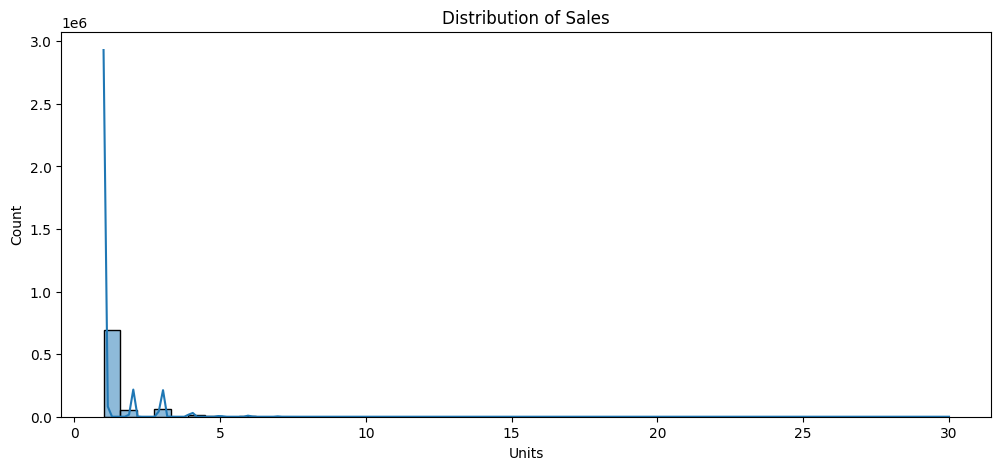

In [31]:
#Sales Distribution
plt.figure(figsize=(12,5))
sns.histplot(merged["Units"], bins=50, kde=True)
plt.title("Distribution of Sales")
plt.show()

## 2.4.2 Correlations

Numeric columns used for correlation matrix:
['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']


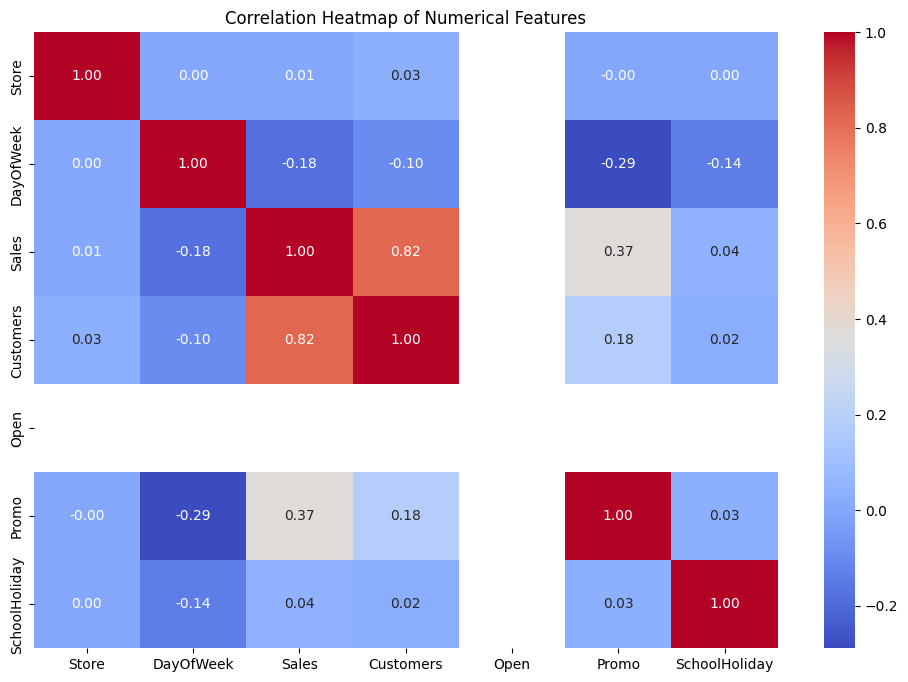


Top correlations with Sales:


Sales            1.000000
Customers        0.823552
Promo            0.368199
SchoolHoliday    0.038635
Store            0.007723
DayOfWeek       -0.178753
Open                  NaN
Name: Sales, dtype: float64


Generating pairplot for: ['Sales', 'Customers', 'Promo', 'DayOfWeek']


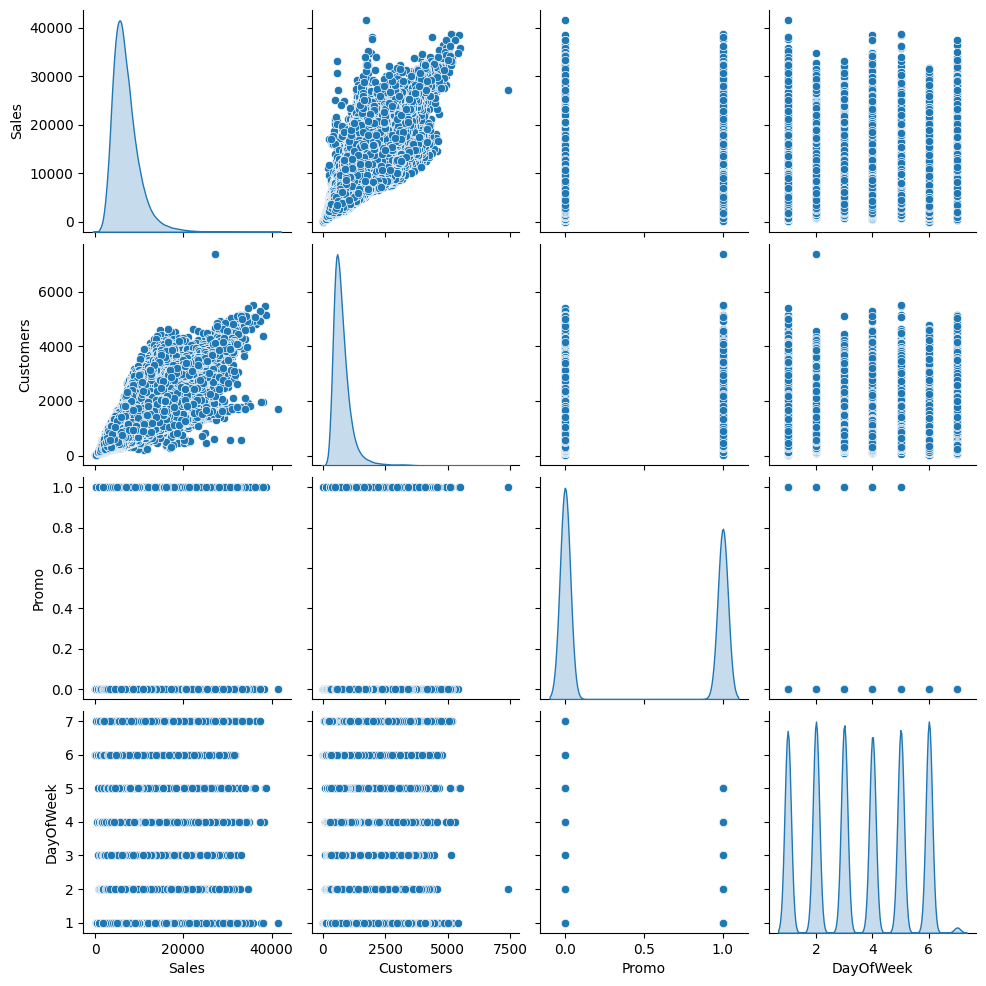


Store-level correlation analysis skipped (no store metadata available).


In [46]:

# 2.4.2 Correlations

import matplotlib.pyplot as plt
import seaborn as sns

# Use merged dataset if available, otherwise df_train_clean
try:
    df_corr = df_train_store.copy()
except NameError:
    df_corr = df_train_clean.copy()

# Select only numerical columns for correlation analysis
numeric_cols = df_corr.select_dtypes(include=['int64','float64']).columns.tolist()

print("Numeric columns used for correlation matrix:")
print(numeric_cols)


# CORRELATION MATRIX

corr_matrix = df_corr[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# STRONGEST CORRELATIONS WITH SALES

if 'Sales' in df_corr.columns:
    print("\nTop correlations with Sales:")
    display(corr_matrix['Sales'].sort_values(ascending=False))


# OPTIONAL PAIRPLOT (LIMITED TO KEY VARIABLES)

pairplot_cols = [col for col in ['Sales', 'Customers', 'Promo', 'CompetitionDistance', 'DayOfWeek'] 
                 if col in df_corr.columns]

if len(pairplot_cols) >= 2:
    print("\nGenerating pairplot for:", pairplot_cols)
    sns.pairplot(df_corr[pairplot_cols], diag_kind='kde')
    plt.show()
else:
    print("\nNot enough numerical columns available for pairplot.")


# STORE-LEVEL CORRELATIONS (IF STORE META EXISTS)
store_columns = ['Store', 'CompetitionDistance', 'Promo2', 'Promo2SinceWeek', 
                 'Promo2SinceYear', 'PromoInterval']

store_cols_available = [col for col in store_columns if col in df_corr.columns]

if len(store_cols_available) > 1:
    print("\nStore-level correlation subset:")
    display(df_corr[store_cols_available].corr())

    plt.figure(figsize=(10,6))
    sns.heatmap(df_corr[store_cols_available].corr(), annot=True, cmap='coolwarm')
    plt.title("Store Metadata Correlations")
    plt.show()
else:
    print("\nStore-level correlation analysis skipped (no store metadata available).")


## 2.4.3 Time-Series Analysis

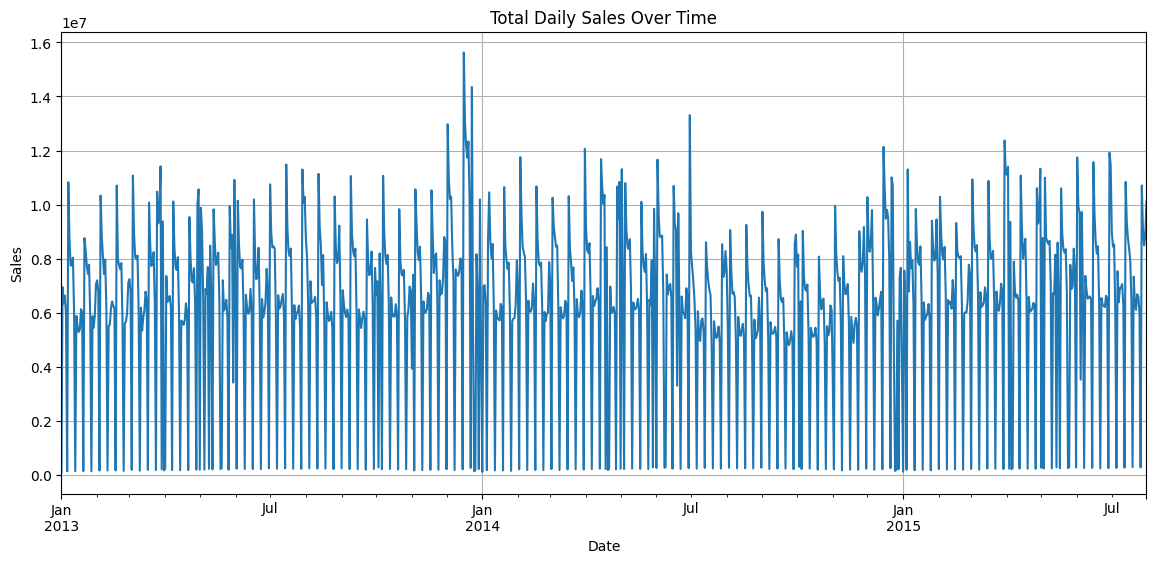

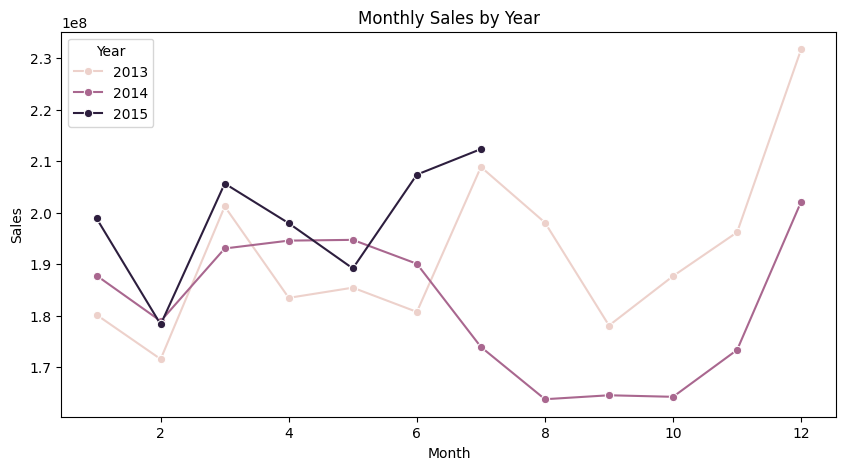

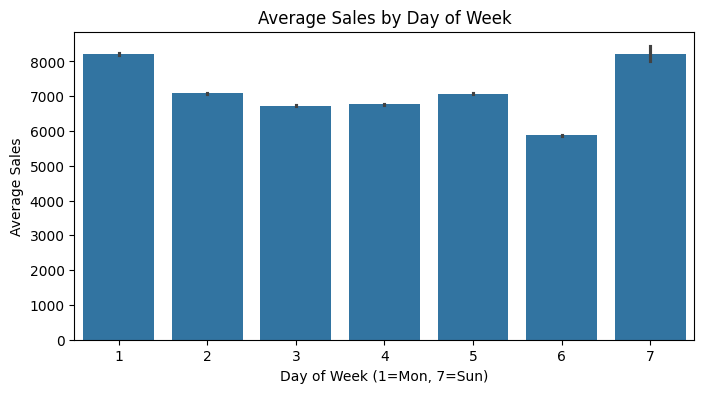

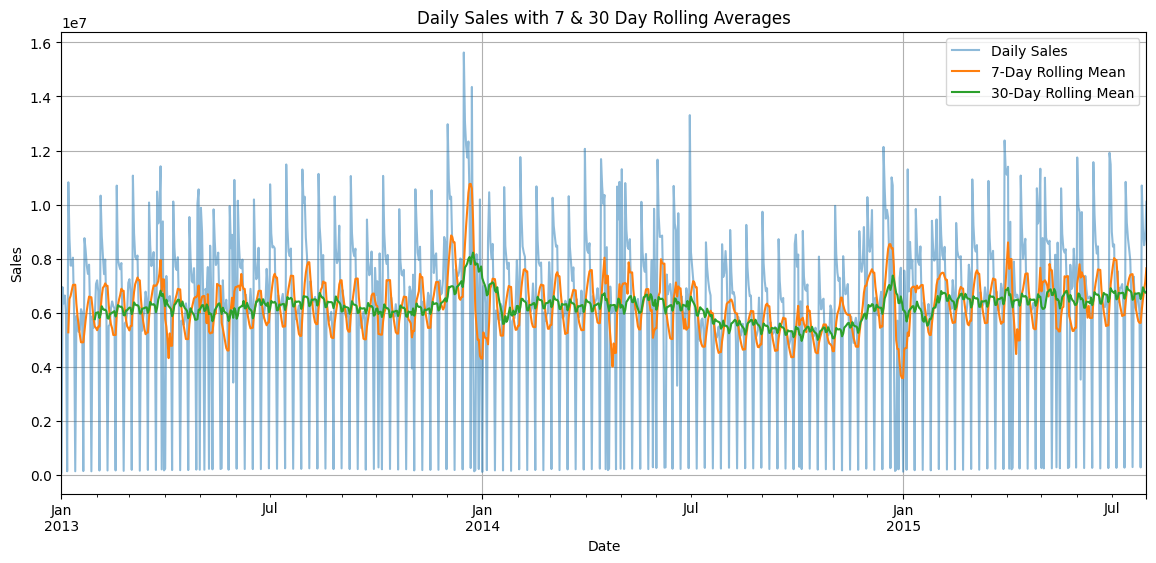

Sample stores selected for time series: [266, 102, 1048]


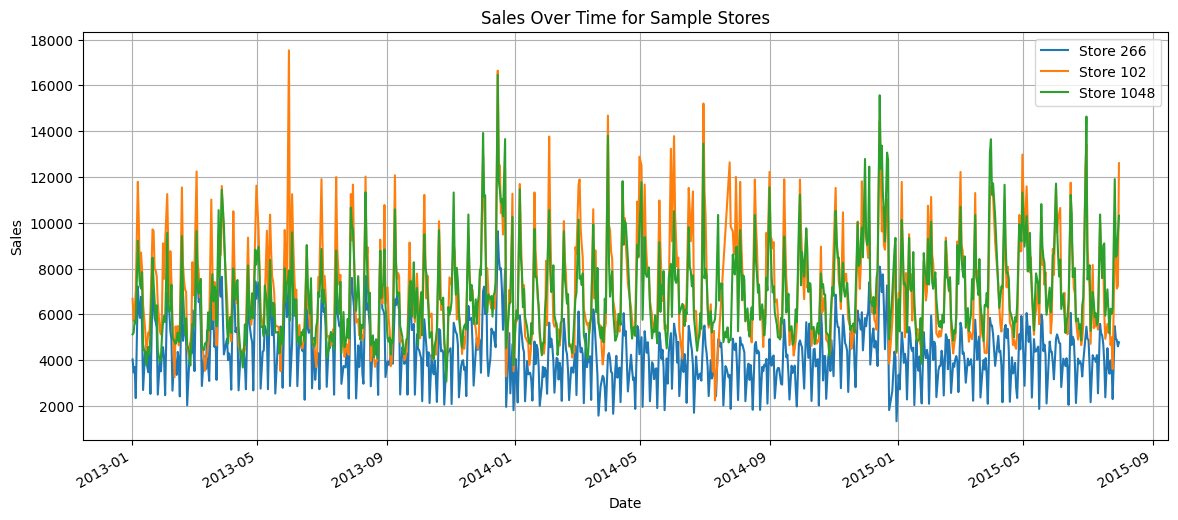

In [47]:

# 2.4.3 TIME-SERIES ANALYSIS

import matplotlib.pyplot as plt
import seaborn as sns

# Use merged dataset if available
try:
    df_ts = df_train_store.copy()
except NameError:
    df_ts = df_train_clean.copy()

# Ensure Date is datetime
df_ts['Date'] = pd.to_datetime(df_ts['Date'])

# TOTAL SALES OVER TIME

plt.figure(figsize=(14,6))
df_ts.groupby('Date')['Sales'].sum().plot()
plt.title("Total Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


# SALES BY MONTH
df_ts['Month'] = df_ts['Date'].dt.month
df_ts['Year'] = df_ts['Date'].dt.year

plt.figure(figsize=(10,5))
monthly_sales = df_ts.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title("Monthly Sales by Year")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

# SALES BY DAY OF WEEK

plt.figure(figsize=(8,4))
sns.barplot(data=df_ts, x='DayOfWeek', y='Sales', estimator='mean')
plt.title("Average Sales by Day of Week")
plt.xlabel("Day of Week (1=Mon, 7=Sun)")
plt.ylabel("Average Sales")
plt.show()


# ROLLING AVERAGE (7-day & 30-day)
daily_sales = df_ts.groupby('Date')['Sales'].sum().sort_index()

plt.figure(figsize=(14,6))
daily_sales.plot(label='Daily Sales', alpha=0.5)
daily_sales.rolling(7).mean().plot(label='7-Day Rolling Mean')
daily_sales.rolling(30).mean().plot(label='30-Day Rolling Mean')
plt.title("Daily Sales with 7 & 30 Day Rolling Averages")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


# STORE-LEVEL TIME SERIES (OPTIONAL SAMPLE)

# To avoid overplotting, we sample a few stores
if 'Store' in df_ts.columns:
    sample_stores = df_ts['Store'].drop_duplicates().sample(3, random_state=42).tolist()
    print("Sample stores selected for time series:", sample_stores)

    plt.figure(figsize=(14,6))
    for s in sample_stores:
        store_series = df_ts[df_ts['Store'] == s].groupby('Date')['Sales'].sum().sort_index()
        store_series.plot(label=f"Store {s}")

    plt.title("Sales Over Time for Sample Stores")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Store column not found; skipping store-level time series.")


In [ ]:
#Convert date column if not already
merged["Date"] = pd.to_datetime(merged["Date"])

#Aggregate Sales Per Day
daily = merged.groupby("Date")["Units"].sum()

#Plot The Time Series
plt.figure(figsize=(12,6))
daily.plot()
plt.title("Daily Units Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

## 2.5 Data Exploration Report

## 3. Data Preparation

## Dataset Description

## 3.1 Select Data

## 3.2 Clean Data

## 3.3 Construct Data

## 3.4 Integrate Data

## 3.5 Format Data

## 4. Modelling

## 4.1 Select Modelling

## 4.2 Techniques

## 4.3 Generate Test Design

## 4.4 Build Model

## 4.5 Assess Model

## 5. Evaluation

## 5.1 Evaluate Results

## 5.2 Review Process

## 5.3 Determine Next Steps

## 6. Deployment / Finalization

## 6.1 Plan Deployment

## 6.2 Plan Monitoring and Maintenance

## 6.3 Produce Final Report

## 6.4 Review Project